In [ ]:
! pip install dcl

In [ ]:
# ! pip install --upgrade huggingface_hub datasets
! pip install datasets==3.6.0
! pip install dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
! pip install epitran

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.5 MB/s eta 0:00:00


In [243]:
# linguistic tools
import epitran
import dcl
import re

In [ ]:
import numpy as np
from itertools import product

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, MaxNLocator
from matplotlib.colors import LogNorm

In [ ]:
from datasets import load_dataset

In [ ]:
import os
import dotenv

In [ ]:
# import os
from huggingface_hub import login

# Option 1: store token as an environment variable
dotenv.load_dotenv()

# Option 2: then use it
login(token=os.getenv('HUGGINGFACe'))

In [ ]:
yoruba_dat = load_dataset("mozilla-foundation/common_voice_17_0","yo",split = "train", token = True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

common_voice_17_0.py:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/132k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_17_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_17_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


n_shards.json:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

audio/yo/train/yo_train_0.tar:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

audio/yo/dev/yo_dev_0.tar:   0%|          | 0.00/28.2M [00:00<?, ?B/s]

audio/yo/test/yo_test_0.tar:   0%|          | 0.00/37.8M [00:00<?, ?B/s]

audio/yo/other/yo_other_0.tar:   0%|          | 0.00/40.8M [00:00<?, ?B/s]

audio/yo/invalidated/yo_invalidated_0.ta(…):   0%|          | 0.00/8.90M [00:00<?, ?B/s]

audio/yo/validated/yo_validated_0.tar:   0%|          | 0.00/111M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/406k [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/298k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/328k [00:00<?, ?B/s]

other.tsv:   0%|          | 0.00/374k [00:00<?, ?B/s]

invalidated.tsv:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

validated.tsv:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1213it [00:00, 41912.63it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 863it [00:00, 76503.45it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 999it [00:00, 37157.23it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1113it [00:00, 58375.88it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 229it [00:00, 59282.53it/s]


Generating validated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3077it [00:00, 74846.16it/s]


In [ ]:
# FIGURING OUT HOW TO FILTER THE DOWNVOTED SENTENCES

In [ ]:
yoruba_upvotes = np.array(yoruba_dat["up_votes"])
yoruba_downvotes = np.array(yoruba_dat["down_votes"])

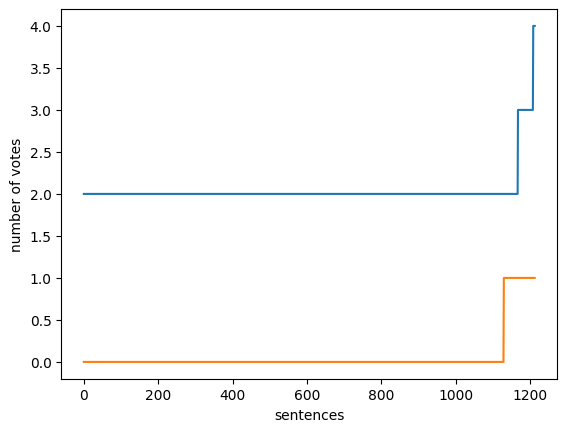

In [ ]:
plt.plot(sorted(yoruba_upvotes))
plt.plot(sorted(yoruba_downvotes))
plt.ylabel('number of votes')
plt.xlabel('sentences')
plt.show()

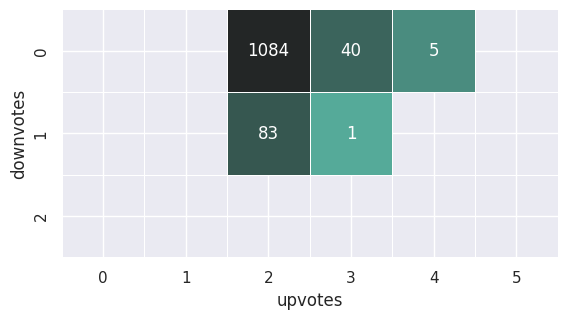

In [ ]:
x_bins = np.arange(0, 6 + 1)
y_bins = np.arange(0, 3 + 1)

H, xedges, yedges = np.histogram2d(
    yoruba_upvotes, yoruba_downvotes,
    bins=(x_bins, y_bins)
)

H_plot = np.where(H == 0, np.nan, H).T

ax = sns.heatmap(
    H_plot,
    annot=H.T, fmt=".0f",
    cmap=sns.color_palette("dark:#5A9_r", as_cmap=True),
    square=True,
    cbar=False,
    norm=LogNorm(),
    xticklabels=xedges[:-1],
    yticklabels=yedges[:-1],
    linewidths=0.5, linecolor="white"
)

ax.set_xlabel("upvotes")
ax.set_ylabel("downvotes")

plt.show()

In [ ]:
## TESTING TRANSLITERATION

In [229]:
epi = epitran.Epitran('yor-Latn')
# text = 'Ẹ kú àárọ̀'
# ipa = epi.transliterate(text)

# print(ipa)

In [224]:
all_raw_sentences = np.array(yoruba_dat["sentence"])

In [230]:
for i in all_raw_sentences[0:10]:
  print(i)
  print(epi.transliterate(i))

Ọmọ ẹgbẹ́ òkùnkùn dèrò àtìmọ́lé torí nílùú Ìbàdàn.
ɔmɔ ɛɡ͡bɛ́ òkùnkùn dèrò àtìmɔ́lé torí nílùú ìbàdàn.
Ìyàwó àwọn ọlọ́pàá tó kú lásìkò ìwọ́de tó kọjá ti bẹ̀bẹ̀ fún ìrànwọ́
ìjàwó àwɔ̃ ɔlɔ́k͡pàá tó kú lásìkò ìwɔ́de tó kɔd͡ʒá ti bɛ̀bɛ̀ fún ìrànwɔ́
Nítori ọrọ táa sọ lọ́jọ́sí ni Túndé yoo fi kúrò nílé ìwé.
nítori ɔrɔ táa sɔ lɔ́d͡ʒɔ́sí ni túndé joo fi kúrò nílé ìwé.
Ilẹ̀ mímìtìtì ní ìlú ṣakí ti sọ àwọn olugbé ibẹ̀ sínú hílàhílo
ilɛ̀ mímìtìtì ní ìlú ʃakí ti sɔ àwɔ̃ oluɡ͡bé ibɛ̀ sínú hílàhílo
Ìgbòho ní Aláàfin, Ọ̀ọ̀nì, Olúbàdàn tì òun lẹ́yìn.
ìɡ͡bòho ní aláàfĩ, ɔ̀ɔ̀nì, olúbàdàn tì òũ lɛ́jìn.
Àfáà ń wáàsù kí àwọn alátìlẹ́yìn rẹ̀ má gba abẹ́rẹ́ àjẹ́sára.
àfáà ń wáàsù kí àwɔ̃ alátìlɛ́jìn rɛ̀ má ɡ͡ba abɛ́rɛ́ àd͡ʒɛ́sára.
Awọn gómìnà kankan ti padà sí ẹgbẹ́ òṣèlú onígbàálẹ̀.
awɔ̃ ɡómìnà kankan ti k͡padà sí ɛɡ͡bɛ́ òʃèlú oníɡ͡bàálɛ̀.
Ọ̀pọ̀ ènìyàn ló fẹ́ kúrò nílè Nàíjíríà.
ɔ̀k͡pɔ̀ ènìjàn ló fɛ́ kúrò nílè nàíd͡ʒíríà.
Ọba ìlú wa kìlọ̀ fún áwọn ọ̀dọ́ lórí ṣíṣe òògùn owó ò

In [231]:
# PROCESSING

In [232]:
# cutoff when 1 downvotes but only 2 upvotes

In [233]:
filter = ~((yoruba_downvotes >= 1) & (yoruba_upvotes <= 2))
sentences = all_raw_sentences[filter]
full = np.full(all_raw_sentences.shape, None, dtype=object)  # keep IDs

In [234]:
print("number of valid sentences: " + str(len(sentences)))

number of valid sentences: 1130


In [235]:
tone_vows = (
        {str(b(a)): a for a, b in product({'a', 'e', 'u', 'i', 'o'}, {dcl.grave, dcl.acute})} |
        {'ń': 'n', 'ḿ': 'm', 'ǹ': 'n', 'm\u0300': 'm'} |
        {a + b: a for a, b in product({'ɔ', 'ɛ'}, {'\u0301', '\u0300'})}
        )
correspondences = tone_vows | {'. ': '||', ',': '|', ':': '||'}
# whitespaces not present in connected speech,
# "-" is used for compounds, "'" and "‘" for contractions -- pronounced in one word
correspondences = correspondences | {'-': '', "'": '', '‘': '', ' ': ''}

def convert(x):  # I just wanted this as a named function
    for dirty, clean in correspondences.items():
        x = x.replace(dirty, clean)
    return x

In [236]:
ipa_sentences = np.vectorize(epi.transliterate)(sentences)

In [237]:
sentences_no_tones = np.vectorize(convert)(ipa_sentences)

In [238]:
sentences_no_tones[0:10]

array(['ɔmɔɛɡ͡bɛokunkunderoatimɔletoriniluuibadan.',
       'ijawoawɔ̃ɔlɔk͡paatokulasikoiwɔdetokɔd͡ʒatibɛbɛfuniranwɔ',
       'nitoriɔrɔtaasɔlɔd͡ʒɔsinitundejoofikuronileiwe.',
       'ilɛmimititiniiluʃakitisɔawɔ̃oluɡ͡beibɛsinuhilahilo',
       'iɡ͡bohonialaafĩ|ɔɔni|olubadantioũlɛjin.',
       'afaanwaasukiawɔ̃alatilɛjinrɛmaɡ͡baabɛrɛad͡ʒɛsara.',
       'awɔ̃ɡominakankantik͡padasiɛɡ͡bɛoʃeluoniɡ͡baalɛ.',
       'ɔk͡pɔenijanlofɛkuronilenaid͡ʒiria.',
       'ɔbailuwakilɔfunawɔ̃ɔdɔloriʃiʃeooɡunowood͡ʒid͡ʒi.',
       'ɔk͡pɔlɔk͡pɔawɔ̃ɔdɔlɔfɛfiorilɛedenaid͡ʒiriasilɛ.'], dtype='<U72')

In [239]:
phoneticize = np.vectorize(lambda x: '/' + x.lower().strip('.?!') + '/')

In [240]:
ipa_sentences = phoneticize(sentences_no_tones)

import pprint
pprint.pp(ipa_sentences[:10])

array(['/ɔmɔɛɡ͡bɛokunkunderoatimɔletoriniluuibadan/',
       '/ijawoawɔ̃ɔlɔk͡paatokulasikoiwɔdetokɔd͡ʒatibɛbɛfuniranwɔ/',
       '/nitoriɔrɔtaasɔlɔd͡ʒɔsinitundejoofikuronileiwe/',
       '/ilɛmimititiniiluʃakitisɔawɔ̃oluɡ͡beibɛsinuhilahilo/',
       '/iɡ͡bohonialaafĩ|ɔɔni|olubadantioũlɛjin/',
       '/afaanwaasukiawɔ̃alatilɛjinrɛmaɡ͡baabɛrɛad͡ʒɛsara/',
       '/awɔ̃ɡominakankantik͡padasiɛɡ͡bɛoʃeluoniɡ͡baalɛ/',
       '/ɔk͡pɔenijanlofɛkuronilenaid͡ʒiria/',
       '/ɔbailuwakilɔfunawɔ̃ɔdɔloriʃiʃeooɡunowood͡ʒid͡ʒi/',
       '/ɔk͡pɔlɔk͡pɔawɔ̃ɔdɔlɔfɛfiorilɛedenaid͡ʒiriasilɛ/'], dtype='<U73')


In [241]:
ipa_sentences = np.char.replace(ipa_sentences, 'ṹ', 'u\u0303')
ipa_sentences = np.char.replace(ipa_sentences, 'ũ', 'u\u0303')
ipa_sentences = np.char.replace(ipa_sentences, 'ĩ', 'i\u0303')

In [244]:
# making it letters
def to_letters(word):
    return re.findall(r'k͡p|ɡ͡b|d͡ʒ|ɔ̃|ɛ̃|ũ|ĩ|\|\||\w|\||/', word, flags=re.UNICODE)

In [245]:
ipa_split_sentences = [to_letters(word) for word in ipa_sentences]

In [246]:
import conversion_tools as ct

alphabets = ct.Inventories()

In [247]:
merged = [phone for sentence in ipa_split_sentences for phone in sentence]
print("Observed letters:", ' '.join(sorted(list(set(merged)))))
print("Expected inventory:", ' '.join(sorted(alphabets.yoruba_ipa)))

Observed letters: / a b d d͡ʒ e f h i ĩ j k k͡p l m n o r s t u ũ w | || ɔ ɔ̃ ɛ ɛ̃ ɡ ɡ͡b ʃ
Expected inventory: a b d d͡ʒ e f h i ĩ j k k͡p l m n o r s t u ũ w ɔ ɛ ɡ ɡ͡b ʃ


In [248]:
result_sentences = [' '.join(s) for s in ipa_split_sentences]

In [249]:
for s in result_sentences[:10]:
    print(s)

/ ɔ m ɔ ɛ ɡ͡b ɛ o k u n k u n d e r o a t i m ɔ l e t o r i n i l u u i b a d a n /
/ i j a w o a w ɔ̃ ɔ l ɔ k͡p a a t o k u l a s i k o i w ɔ d e t o k ɔ d͡ʒ a t i b ɛ b ɛ f u n i r a n w ɔ /
/ n i t o r i ɔ r ɔ t a a s ɔ l ɔ d͡ʒ ɔ s i n i t u n d e j o o f i k u r o n i l e i w e /
/ i l ɛ m i m i t i t i n i i l u ʃ a k i t i s ɔ a w ɔ̃ o l u ɡ͡b e i b ɛ s i n u h i l a h i l o /
/ i ɡ͡b o h o n i a l a a f ĩ | ɔ ɔ n i | o l u b a d a n t i o ũ l ɛ j i n /
/ a f a a n w a a s u k i a w ɔ̃ a l a t i l ɛ j i n r ɛ m a ɡ͡b a a b ɛ r ɛ a d͡ʒ ɛ s a r a /
/ a w ɔ̃ ɡ o m i n a k a n k a n t i k͡p a d a s i ɛ ɡ͡b ɛ o ʃ e l u o n i ɡ͡b a a l ɛ /
/ ɔ k͡p ɔ e n i j a n l o f ɛ k u r o n i l e n a i d͡ʒ i r i a /
/ ɔ b a i l u w a k i l ɔ f u n a w ɔ̃ ɔ d ɔ l o r i ʃ i ʃ e o o ɡ u n o w o o d͡ʒ i d͡ʒ i /
/ ɔ k͡p ɔ l ɔ k͡p ɔ a w ɔ̃ ɔ d ɔ l ɔ f ɛ f i o r i l ɛ e d e n a i d͡ʒ i r i a s i l ɛ /


In [250]:
full[filter] = result_sentences

In [253]:
with open('data/processed_yor_sentences.txt', 'w', encoding='utf-8') as f_w:
    for sentence in full:
        print(sentence, file=f_w)

In [ ]:
## TESTING THE UNINCLUDED SYMBOLS
# transl_test = set()
# for sentence in ipa_sentences:
#     for letter in sentence:
#         if letter not in (
#             alphabets.yoruba_ipa
#             | {'|', '||', '/'}
#             # sybols as parts of our stuff: tilde, ipa bridge, accent marks
#             | {'\u0303', '\u0361', '\u0301', '\u0300'}
#             | {'p', 'ʒ'} ):  # parts of affricates and double articulated
#             transl_test.add(letter)

# print(transl_test)

# for i, sentence in enumerate(ipa_sentences):
#     if transl_test & set(sentence):
#         print(i, sentence, transl_test & set(sentence))
#         print(sentences[i])


In [ ]:
# read_commonvoice